In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# https://www.transitchicago.com/data/

In [2]:
l_stops_raw = pd.read_csv("cta_data/CTA_-_System_Information_-_List_of__L__Stops_-_Map.csv")

In [13]:
# convert coords to a readable dict
locations = l_stops_raw.Location.apply(lambda x: x[1:-1].split(","))
coords = pd.DataFrame(locations.tolist(), columns=['lat', 'long']).astype('float')

l_stops = l_stops_raw.drop(['Location'], axis=1)
l_stops = l_stops.join(coords)

l_stops

,STOP_ID,STOP_NAME,STATION_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,lat,long
0,30162,18th (54th/Cermak-bound),18th,40830,True,False,False,False,False,False,False,False,True,False,41.857908,-87.669147
1,30161,18th (Loop-bound),18th,40830,True,False,False,False,False,False,False,False,True,False,41.857908,-87.669147
2,30022,35th/Archer (Loop-bound),35th/Archer,40120,True,False,False,False,False,False,False,False,False,True,41.829353,-87.680622
3,30023,35th/Archer (Midway-bound),35th/Archer,40120,True,False,False,False,False,False,False,False,False,True,41.829353,-87.680622
4,30214,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,41120,True,False,False,True,False,False,False,False,False,False,41.831677,-87.625826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,30129,Western (O'Hare Branch) (O'Hare-bound),Western,40670,True,False,True,False,False,False,False,False,False,False,41.916157,-87.687364
296,30385,Wilson (Loop-bound),Wilson,40540,True,False,False,False,False,False,True,False,False,False,41.964273,-87.657588
297,30106,Wilson (95th-bound),Wilson,40540,True,True,False,False,False,False,False,False,False,False,41.964273,-87.657588
298,30105,Wilson (Howard-bound),Wilson,40540,True,True,False,False,False,False,False,False,False,False,41.964273,-87.657588


In [15]:
node_coords = {}
for i in coords.index:
    node_coords[l_stops['STOP_ID'][i]] = (coords.iloc[i].long, 
                      coords.iloc[i].lat)

In [22]:
# read in stop colors
stop_colors = l_stops[['STOP_ID', 'RED', 'BLUE', 'G', 'BRN', 'P', 'Pexp', 'Y','Pnk', 'O']]

colors_dict = {}
for i in stop_colors.index:
    colors_list = []
    for c in stop_colors.columns.astype('str'):
        if stop_colors[c][i] == True:
            colors_list.append(c)
    if len(colors_list) == 0:
        colors_list.append('BLK')
    colors_dict[l_stops['STOP_ID'][i]] = colors_list

In [54]:
G = nx.Graph()

G.add_nodes_from(node_coords.keys())
color_conversion = {'RED':'red', 'BLUE':'blue', 'G':'green', 'BRN':'brown', 'P':'purple', 'Pexp':'purple', 'Y':'yellow','Pnk':'pink', 'O':'orange', 'BLK':'k'}
for n in G.nodes:
    G.nodes[n]['pos'] = node_coords[n]
    G.nodes[n]['colors'] = colors_dict[n]
    G.nodes[n]['node_color'] = color_conversion[colors_dict[n][0]]
    print(G.nodes[n]['node_color'])

pink
pink
orange
orange
green
green
green
green
green
green
red
red
green
green
pink
pink
red
red
red
red
red
red
red
red
red
red
green
green
blue
blue
brown
brown
red
red
red
red
brown
brown
green
green
orange
orange
green
green
blue
blue
green
green
blue
blue
red
red
brown
brown
red
red
red
red
pink
pink
green
green
blue
blue
green
green
purple
purple
pink
pink
red
red
green
green
blue
brown
brown
red
red
blue
pink
pink
blue
blue
green
green
red
red
green
green
blue
blue
blue
blue
green
green
green
green
green
green
blue
blue
pink
pink
blue
blue
brown
brown
purple
purple
purple
purple
yellow
yellow
brown
brown
blue
blue
blue
blue
purple
purple
brown
brown
red
red
brown
brown
green
green
red
red
blue
blue
red
red
red
red
orange
orange
green
green
blue
blue
blue
blue
green
green
purple
brown
red
red
purple
red
red
purple
blue
blue
green
green
blue
blue
brown
brown
blue
blue
red
red
red
red
blue
blue
orange
orange
pink
pink
brown
brown
green
green
blue
blue
brown
brown
green
green
pink


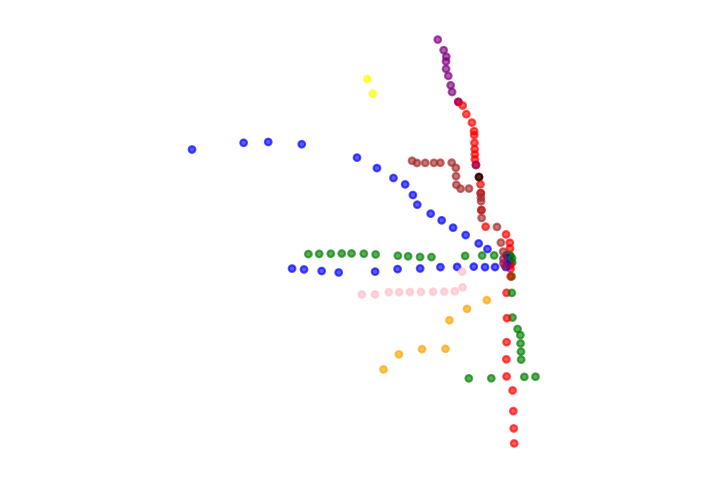

In [57]:
fig, ax = plt.subplots(dpi=150)
# [G.nodes[i]['color'] for i in G.nodes]
nx.draw(G, node_coords, ax=ax, alpha=0.4, node_size=10, node_color=[G.nodes[i]['node_color'] for i in G.nodes])
plt.axis('equal')
plt.grid(which='both')
plt.show()
